In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from env_defaults import TOPICS_STATIC, get_len_trial, TOPICS_STATIC_SMALL, LATENT_STATIC_SMALL, ML_100K_SMALL

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior
from reclab.environments import Topics

from reclab.recommenders import LibFM, TopPop, RandomRec, PerfectRec



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [27]:
## Key Parameters across all settings

bucket_name = None

n_trials = 3
trial_seeds = [i for i in range(n_trials)]
len_trial = get_len_trial(LATENT_STATIC_SMALL)
num_init_ratings = LATENT_STATIC_SMALL['optional_params']['num_init_ratings']

# Environment setup
environment_names = [LATENT_STATIC_SMALL['name'], TOPICS_STATIC_SMALL['name'], ML_100K_SMALL['name']]
envs = [LatentFactorBehavior(**LATENT_STATIC_SMALL['params'], **LATENT_STATIC_SMALL['optional_params']), 
       Topics(**TOPICS_STATIC_SMALL['params'], **TOPICS_STATIC_SMALL['optional_params']),
       DatasetLatentFactor(**ML_100K_SMALL['params'], **ML_100K_SMALL['optional_params']),]

# Recommender setup
recommender_names = ['libfm', 'random', 'toppop', 'perfect']


In [28]:

recommenders_base = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
    ),
    RandomRec(
    ),
    TopPop(
    ),
] 
recommender_names = ['libfm', 'random', 'toppop', 'perfect']
# recommenders_base = []

In [29]:

all_ratings = {}
all_predictions = {}
all_dense_ratings = {}
all_dense_predictions = {}

for env in envs:
    
    def get_dense_ratings(env):
        def func():
            return env.dense_ratings
        return func

    recommenders = recommenders_base + [PerfectRec(get_dense_ratings(env))]


    res = run_env_experiment(
            [env],
            recommenders,
            trial_seeds,
            len_trial,
            environment_names=environment_names,
            recommender_names=recommender_names,
            bucket_name=bucket_name)
    ratings, predictions, dense_ratings, dense_predictions = res
    all_ratings[env.name] = ratings[0]
    all_predictions[env.name] = predictions[0]
    all_dense_ratings[env.name] = dense_ratings[0]
    all_dense_predictions[env.name] = dense_predictions[0]


Started experiments on environment: latent_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 16.52941176470588%
Running trials for recommender: libfm
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: random
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: toppop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: perfect
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Started experiments on environment: latent_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 28.135294117647057%
Running trials for recommender: libfm
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: random
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: toppop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: perfect
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Started experiments on environment: latent_static_small
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 6.482352941176471%
Running trials for recommender: libfm
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two


Running trial with seed: 1
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 2
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: random
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 1
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 2
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: toppop
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 1
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 2
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: perfect
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 1
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trial with seed: 2
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.


In [30]:
all_ratings.keys()

dict_keys(['latent', 'topics', 'latent-ml-100k'])

<IPython.core.display.Javascript object>


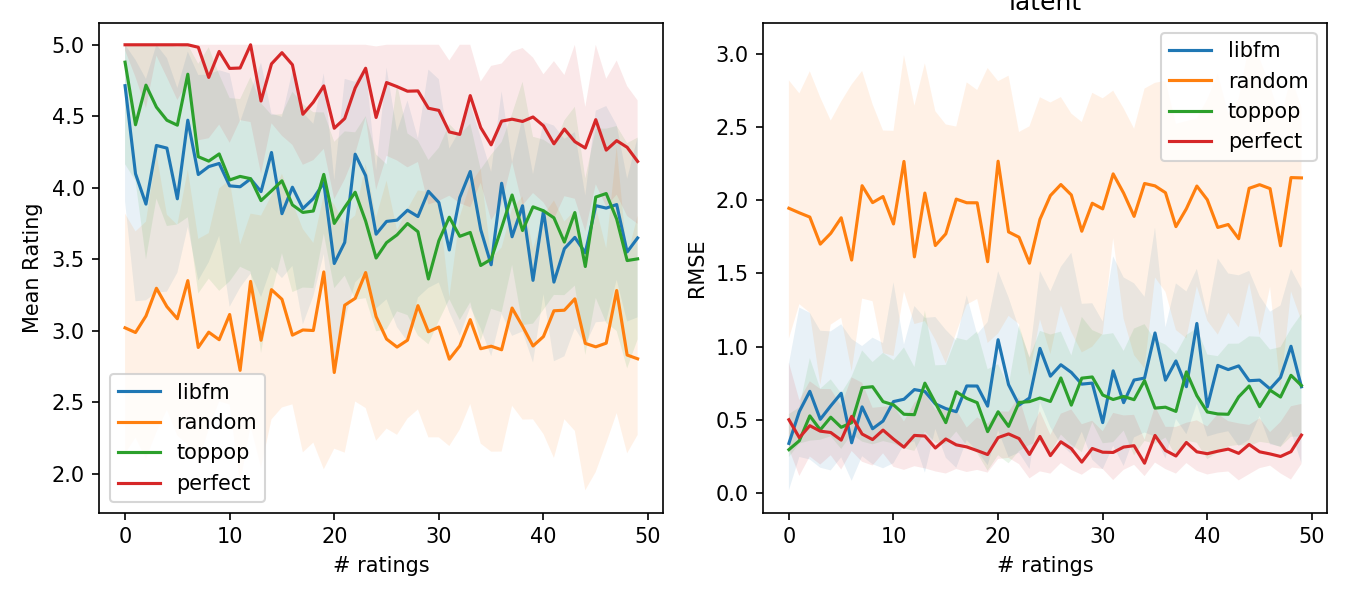

<IPython.core.display.Javascript object>


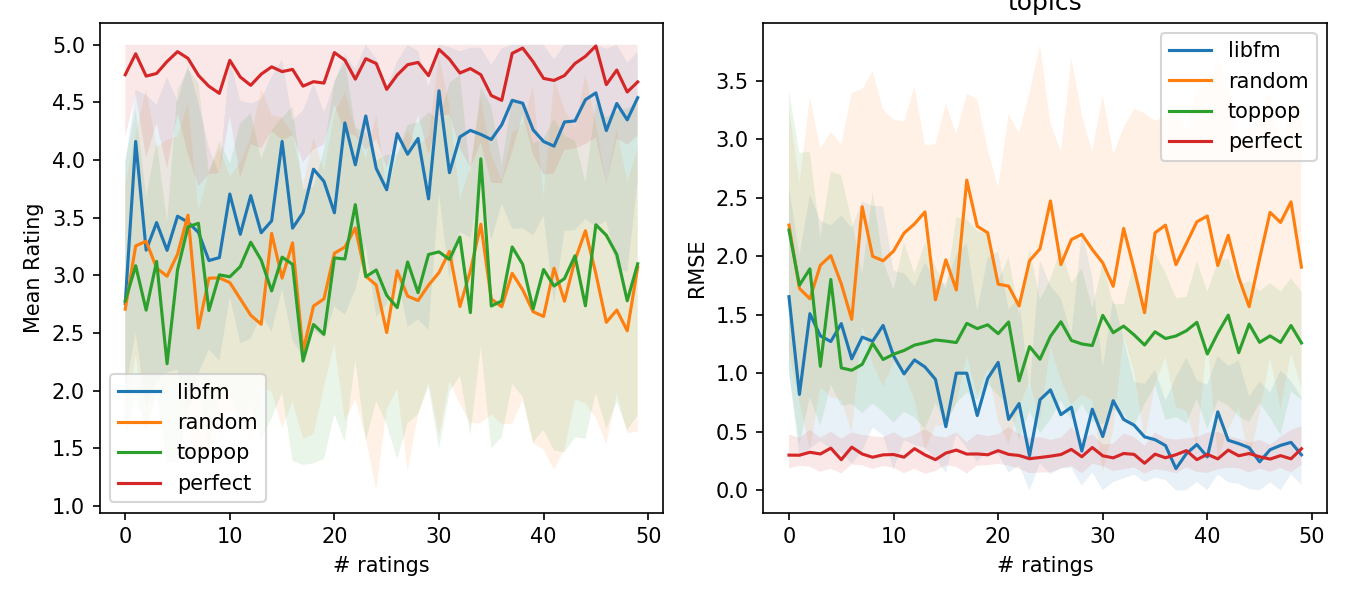

<IPython.core.display.Javascript object>


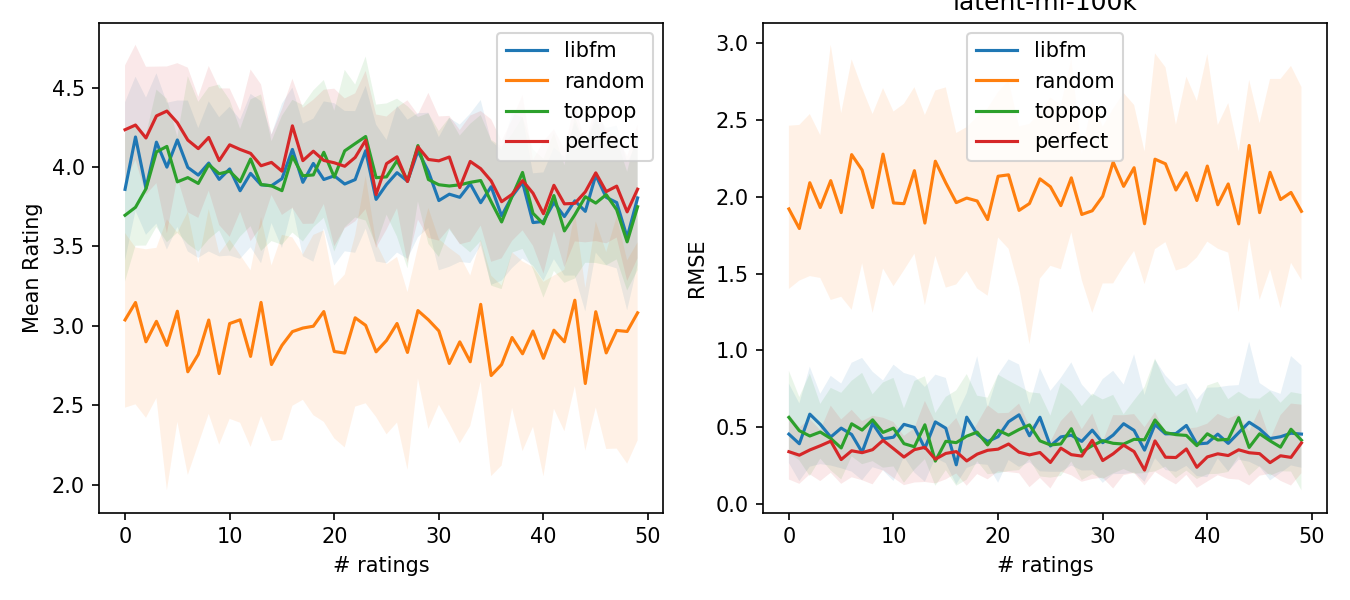

In [31]:
for env_name in all_ratings.keys():
    plot_ratings_mses(all_ratings[env_name], all_predictions[env_name], recommender_names, summary_type='median')
    plt.title(env_name)